# Assignment Week 6

In [15]:
%matplotlib ipympl
import numpy as np
from numpy import cos, sin, pi, exp 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

## Problem 1 - 1-D simple polynomial

The gradient is not specified.  You can write the function for gradient on your own.  The range within which to search for minimum is [-5, 5].

In [16]:
def f1(x):
    return x ** 2 + 3 * x + 8

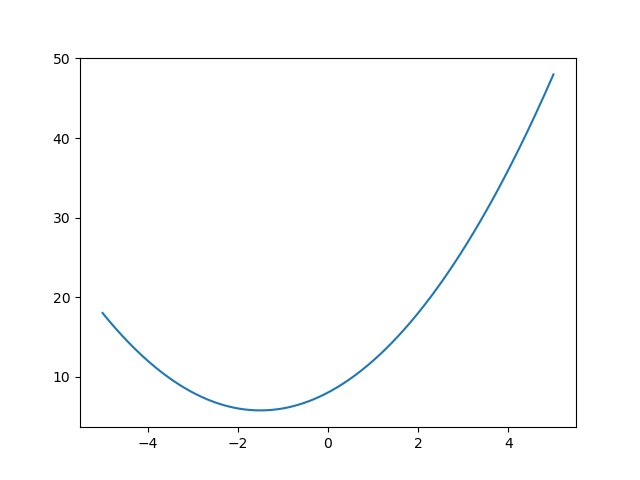

In [17]:
# Define the function and its gradient
def f(x):
    return x ** 2 + 3 * x + 8

def grad_f(x):
    return 2 * x + 3

def gradi_descent(f, grad_f, range_list, lr=0.1, steps=10):
    x_list = []
    y_list = []
    x = range_list[1]
    for step in range(steps):
        x = x - grad_f(x) * lr
        x_list.append(x)
        f_val = f(x)
        y_list.append(f_val)
    x_base = np.linspace(range_list[0], range_list[1], 1000)
    y_base = f(x_base)
    return x_list, y_list, x_base, y_base

fig, ax = plt.subplots()
x_all, y_all = [], []
ln_all, = ax.plot([], [], 'ro')
ln_good, = ax.plot([], [], 'go', markersize=10)

range_list = [-5, 5]
x_list, y_list, x_base, y_base = gradi_descent(f, grad_f, range_list)
ax.plot(x_base, y_base)


def animation(frame):
    ln_good.set_data(x_list[frame], y_list[frame])
    x_all.append(x_list[frame])
    y_all.append(y_list[frame])
    ln_all.set_data(x_all, y_all)

ani = FuncAnimation(fig, animation, frames=range(len(x_list)), interval=500, repeat=False)
plt.show()


The above lines implements the gradient descent algorithm to find the minimum point of a given function f(x).

The function f(x) is defined as x ** 2 + 3 * x + 8, and its gradient function grad_f(x) is defined as 2 * x + 3.
The function gradi descent takes the inputs of the function f, its gradient function grad f, a range list defining the range of values for x, a learning rate (lr), and the number of steps to be taken (steps). The gradient of f assessed at x is then subtracted, and the learning rate is multiplied by the original value of x, before repeatedly updating it. To x_list and y_list, respectively, it appends the updated x value and the associated f(x) value. Then it uses a range of x values to generate a base plot of the function f, returning the x_list, y_list, x_base, and x_base.

Following that, it creates an animation function that, given a frame number, updates the plot by updating the data for ln_good and ln_all to the x and y values at that frame, respectively. The data for ln_all is then set to these lists after appending the x and y values to x_all and y_all, respectively. Using the animation function and a frame range of 0 to the length of the x list, the FuncAnimation function generates an animation. Lastly, plt.show is used to display the plot ().

## Problem 2 - 2-D polynomial

Functions for derivatives, as well as the range of values within which to search for the minimum, are given.

In [18]:
xlim3 =  [-10, 10]
ylim3 =  [-10, 10]
def f3(x, y):
    return x**4 - 16*x**3 + 96*x**2 - 256*x + y**2 - 4*y + 262

def df3_dx(x, y):
    return 4*x**3 - 48*x**2 + 192*x - 256

def df3_dy(x, y):
    return 2*y - 4


In [19]:
x_axis =  np.linspace(-10, 10, 200)
y_axis =  np.linspace(-10, 10, 200)
z_axis = f3(x_axis, y_axis)

x_best_pt = -10 # Random initial guess
y_best_pt = -10
bestcost = 100000

x_cord, y_cord, z_cord = [], [], []
lr_x = 0.062
lr_y = 1e-5
iterations = 10

def minima(func, deriv_x, deriv_y, start_pts, LR_x, LR_y):
    global x_best_pt, lr_x, y_best_pt, lr_y, iterations
    
    lr_x = LR_x
    lr_y = LR_y
    x_best_pt, y_best_pt = start_pts
    x_cord, y_cord, z_cord = [], [], []
    x_cord.append(x_best_pt)
    y_cord.append(y_best_pt)
    z_cord.append(func(x_best_pt, y_best_pt))
    for i in range(iterations):
        x = x_best_pt - df3_dx(x_best_pt, y_best_pt) * lr_x 
        y = y_best_pt - df3_dy(x_best_pt, y_best_pt) * lr_y
        x_best_pt = x
        y_best_pt = y
        best_z = func(x_best_pt, y_best_pt)
        x_cord.append(x_best_pt)
        y_cord.append(y_best_pt)
        z_cord.append(best_z)
    return x_cord, y_cord, z_cord

x1,y1,z1 = minima(f3, df3_dx, df3_dy, (2,2), lr_x, lr_y)
print(f"Minima value at x = {x1[-1]}, y = {y1[-1]} is z = {z1[-1]}")


Minima value at x = 3.9840091353125224, y = 2.0 is z = 2.0000000653864163


The gradient descent method is used "minima" function, which find the minimum point of a given function of two variables (x, y).

Three arrays, x_axis, y_axis, and z_axis, are initialized in the code to be used to build a meshgrid for the function f3. The function is shown in three dimensions using the meshgrid.

The code then initialises the bestcost variable to a high value and sets the first prediction for the minimum point to (-10, -10). The number of iterations is set to 10, and the learning rates for the x and y directions are set to lr_x and lr_y, respectively.

The minima function includes the function f3, its partial derivatives with respect to x and y (df3_dx and df3_dy), the beginning points for x and y (start_pts), and the x and y learning rates (LR x and LR y). The x and y coordinates are initialised, along with the function's value at the first estimate, and they are appended to the appropriate arrays. It then does gradient descent, updating the best_x, best_y, and best_z values if the current_z value is less than the previous bestcost, by repeatedly updating x and y using their respective partial derivatives and learning rates. The method returns the arrays after appending the x, y, and z coordinates to the appropriate arrays.

-10


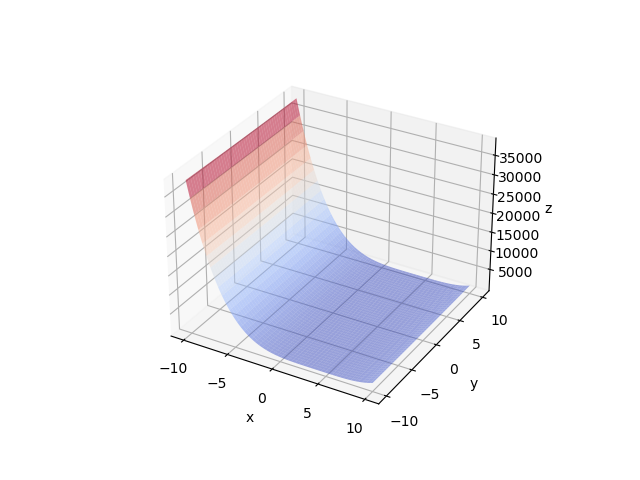

In [25]:

x_best_pt = -10# initial guess
y_best_pt = -10
X, Y = np.meshgrid(x_axis, y_axis)
Z = f3(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
x_cord, y_cord, z_cord = [], [], []

xlr = 0.005
ylr = 0.1
lnall, = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    global bestcost, x_best_pt, y_best_pt, xlr, ylr
    x = x_best_pt - df3_dx(x_best_pt, y_best_pt) * xlr 
    y = y_best_pt - df3_dy(x_best_pt, y_best_pt) * ylr 
    x_best_pt = float(x)
    y_best_pt = float(y)
    z = f3(x, y)
    lngood.set_data(x, y)
    lngood.set_3d_properties(z)
    x_cord.append(x)
    y_cord.append(y)
    z_cord.append(z)
    lnall.set_data(x_cord, y_cord)
    lnall.set_3d_properties(z_cord)
    return lngood,
    
print(x_best_pt)
ani= FuncAnimation(fig, onestepderiv, range(200), interval=1000, repeat=False)
plt.show()




The above line creates a 3D plot of a function and animates the process of finding its minimum value using gradient descent.

Using x_best_pt and y_best_pt, the function's lowest value is first set as an initial best guess. Then, using np.meshgrid(), a mesh grid of x and y values is generated, and the function values for these points are calculated and saved in Z.

Using X, Y, and Z as the inputs, a 3D plot is then made with plt.axes(projection='3d'), and the surface of the function is drawn with ax.plot surface(). The x, y, and z axes now have labels.

The onestepderiv() function, which accepts a frame number as an argument, runs the gradient descent process. The algorithm determines the partial derivatives of the function with respect to x and y at the current best point in each frame, and then modifies the values of x and y by deducting the corresponding derivatives multiplied by xlr and ylr, respectively. The 3D graph is then updated with the new x, y, and function values at these locations.

The onestepderiv() method is called for each frame of the animation by FuncAnimation(), which also updates the plot as necessary. With a one-second gap between each frame, the animation has 200 frames.

## Problem 3 - 2-D function 

Derivatives and limits given. 

In [21]:
xlim4 = [-pi, pi]
# Defining function and derivative
def f4(x,y):
    return exp(-(x - y)**2)*sin(y)


def df4_dx(x, y):
    return -2*exp(-(x - y)**2)*sin(y)*(x - y)

def df4_dy(x, y):
    return exp(-(x - y)**2)*cos(y) + 2*exp(-(x - y)**2)*sin(y)*(x - y)


In [22]:
pi = np.pi

#Limits for independent variables.
xaxis = np.linspace(-pi,pi,100)
yaxis = np.linspace(-pi,pi,100)
zaxis = f4(xaxis, yaxis)

# Starting point
best_x = 3 
best_y = 1
bestcost = 100000

xCord, yCord, zCord = [], [], []
lr_x = 0.1
lr_y = 0.1
it = 40

def minimaFun(func, deriv_x, deriv_y, start_point, LR_x, LR_y):
    global best_x, lr_x, best_y, lr_y, it
    
    lr_x = LR_x
    lr_y = LR_y
    best_x, best_y = start_point
    xCord, yCord, zCord = [], [], []
    xCord.append(best_x)
    yCord.append(best_y)
    zCord.append(func(best_x, best_y))
    for i in range(it):
        x = best_x - df4_dx(best_x, best_y) * lr_x 
        y = best_y - df4_dy(best_x, best_y) * lr_y
        best_x = x
        best_y = y
        best_z = func(best_x, best_y)
        xCord.append(best_x)
        yCord.append(best_y)
        zCord.append(best_z)
    return xCord, yCord, zCord

p, q = -3, -2.5
x1,y1,z1 = minimaFun(f4, df4_dx, df4_dy, (p, q), lr_x, lr_y)
print(f"Minima value at x = {x1[-1]}, and y = {y1[-1]} is z = {z1[-1]}")

Minima value at x = -1.8488259765634438, and y = -1.7868279788122032 is z = -0.9730085736163717


Same Logic as Problem 2

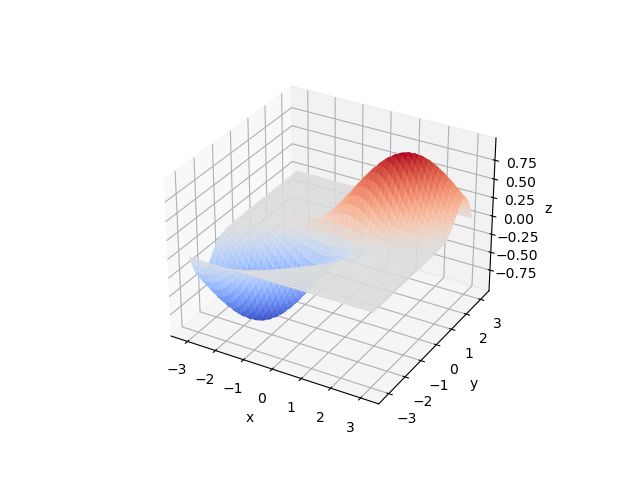

In [26]:
best_x = p 
best_y = q

X, Y = np.meshgrid(xaxis, yaxis)
Z = f4(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
xall, yall, zall = [], [], []

lr = 0.1
lnall,  = ax.plot([], [], [], 'ro')
lngood, = ax.plot([], [], [], 'go', markersize=10)

def onestepderiv(frame):
    global bestcost, best_x, best_y, lr
    x = best_x - df4_dx(best_x, best_y) * lr 
    y = best_y - df4_dy(best_x, best_y) * lr 
    best_x = x
    best_y = y
    z = f4(x, y)
    lngood.set_data_3d(x, y, z)
    xall.append(x)
    yall.append(y)
    zall.append(z)
    lnall.set_data_3d(xall, yall, zall)
    return lngood,
    

ani= FuncAnimation(fig, onestepderiv, frames=range(50), interval=1000, repeat=False)
plt.show()

Same Logic as Problem 2

## Problem 4 - 1-D trigonometric

Derivative not given.  Optimization range [0, 2*pi]

In [28]:
def f5(x):
    return cos(x)**4 - sin(x)**3 - 4*sin(x)**2 + cos(x) + 1

def f5_prime(x):
    return -4*cos(x)**3*sin(x) - 3*sin(x)**2*cos(x) - 8*sin(x)*cos(x) - sin(x)

In [31]:
x_axis = np.linspace(-5,5,200)
y_axis = f5(x_axis)

best_x = 2 # Random initial guess
bestcost = 100000

xCord, yCord = [], []
lr = 0.1 # Learning Rate
it = 20

def min_finder(func, deriv, start_point, LR):
    global best_x, lr, it
    
    lr = LR
    best_x = start_point
    xCord, yCord = [], []
    xCord.append(best_x)
    yCord.append(func(best_x))
    for i in range(it):
        x = best_x - deriv(best_x) * lr 
        best_x = x
        best_y = func(best_x)
        xCord.append(best_x)
        yCord.append(best_y)
    return xCord, yCord

x = np.random.uniform(0, 2*pi, (1,))
a,b = min_finder(f5, f5_prime, x, 0.1)
print(f"Minima value at x = {a[-1]} is y = {b[-1]}")

Minima value at x = [1.66166081] is y = [-4.04541205]


Same Logic as Problem 2 but for 1D

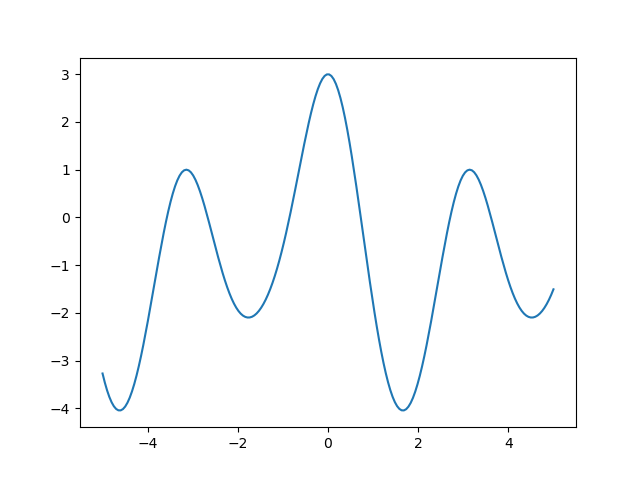

In [32]:
best_x = 2.8 # Random initial guess
bestcost = 100000

fig, ax = plt.subplots()
ax.plot(x_axis, y_axis)
xall, yall = [], []

lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

def onestepderiv(frame):
    global bestcost, best_x, lr
    x = best_x - f5_prime(best_x) * lr 
    best_x = x
    y = f5(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(20), interval=1000, repeat=False)
plt.show()

Same Logic as Problem 2 but for 1D